# Final Exam ENGR 492
**Author:** Andre Cox

**Student ID:** 95076758

## Design Problem 
Design Problem, determine the shape of a vertical bar that will
experience a uniform axial stress, or an axial stress that increases by 2 percent, 3 percent, 5
percent, or 10 percent along its length, when the bar is hanging under its own weight and an axial
force P.

The bar has a varying cross-sectional area A(x), where:
- x = 0 is the bottom of the bar
- x = L is the top attachment
- A(x) is the unknown shape you must determine

You must evaluate the following stress distributions:
1. Uniform axial stress
2. Stress increasing by 2 percent from bottom to top
3. Stress increasing by 3 percent
4. Stress increasing by 5 percent
5. Stress increasing by 10 percent

Next, approximate the bar using disk elements. Use the following numbers of disks to investigate
how the numerical resolution affects the solution:
- 2 disks
- 10 disks
- 20 disks
- 100 disks
- 150 disks
- 500 disks

## Model Inputs
- P = 1000 N
- ρ = 8000 kg/m^3
- g = 9.81 m/s^2
- t = 0.2 m (thickness)
- W(0) = 0.5 m (width of the bar at x = 0)
- L = 1 m (bar length)

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Specify Constants and Inputs

In [1]:
P_applied_force = 1000 # Applied force in Newtons
p_density = 8000 # Density in kg/m^3
g_gravity = 9.81 # Gravity in m/s^2
w0_initial_width = 0.5 # Initial width in meters
L_length = 1.0 # Length in meters

### Create helper functions 
Create some helpers for area and stress

In [40]:
stress_from_area = lambda P, A: P / A
circle_area = lambda r: np.pi * r**2
analytical_area = lambda x, A0, density, g, P: A0 * np.exp((A0* density * g * x) / P)

### Solving steps idea

1. Compute the weight of the first disk element at the bottom using initial width and dx
2. Compute the stress at the bottom using applied force and area, we save this as our reference stress
3. Use the weight of the first disk to add to the applied force to get the total force at the next disk
4. compute the area at the next disk to keep the stress the same as the reference stress
5. Continue the process up the bar length

In [111]:
sections = 500

dx = L_length / sections
x_positions = np.linspace(0, L_length, sections + 1)

force = P_applied_force

disk_weights = []
areas = []

reference_stress = 0


# Determine the initial area and reference stress
areas.append(circle_area(w0_initial_width / 2))
reference_stress = stress_from_area(force, areas[-1])
disk_weights.append(0)  # No weight at the bottom

# Print initial conditions
print ("------- x_position[0]: 0.00 m -------") # Print what position we're at
print(f"Applied Force: {P_applied_force} N")
print(f"Initial Area: {areas[-1]:.6f} m^2")
print(f"Reference Stress: {reference_stress:.2f} Pa")


for i, x in enumerate(x_positions[1:]):
    print(f"------- x_position[{i}]: {x:.2f} m -------") # Print what position we're at
    
    # Step 1. Compute the weight of the previous disk we model this as a cylinder
    disk_weight = p_density * g_gravity * areas[-1] * dx
    disk_weights.append(disk_weight)
    
    # Step 2. Update the force with the disk weight
    force += disk_weight
    
    # Step 3. Compute the area needed to maintain the reference stress
    area = force / reference_stress
    areas.append(area)
    
    
    
    print(f"Applied Force: {force:.2f} N")
    print(f"Computed Area: {area:.6f} m^2")
    print(f"Disk Weight: {disk_weight:.2f} N")
    print("")
    
    
    
print("--------------------------------------")

df = pd.DataFrame({
    'Position (m)': x_positions,
    'Area (m^2)': areas,
    'Disk Weight (N)': disk_weights
})


------- x_position[0]: 0.00 m -------
Applied Force: 1000 N
Initial Area: 0.196350 m^2
Reference Stress: 5092.96 Pa
------- x_position[0]: 0.00 m -------
Applied Force: 1030.82 N
Computed Area: 0.202401 m^2
Disk Weight: 30.82 N

------- x_position[1]: 0.00 m -------
Applied Force: 1062.59 N
Computed Area: 0.208639 m^2
Disk Weight: 31.77 N

------- x_position[2]: 0.01 m -------
Applied Force: 1095.34 N
Computed Area: 0.215069 m^2
Disk Weight: 32.75 N

------- x_position[3]: 0.01 m -------
Applied Force: 1129.09 N
Computed Area: 0.221697 m^2
Disk Weight: 33.76 N

------- x_position[4]: 0.01 m -------
Applied Force: 1163.89 N
Computed Area: 0.228529 m^2
Disk Weight: 34.80 N

------- x_position[5]: 0.01 m -------
Applied Force: 1199.76 N
Computed Area: 0.235572 m^2
Disk Weight: 35.87 N

------- x_position[6]: 0.01 m -------
Applied Force: 1236.74 N
Computed Area: 0.242833 m^2
Disk Weight: 36.98 N

------- x_position[7]: 0.02 m -------
Applied Force: 1274.85 N
Computed Area: 0.250316 m^2
Di

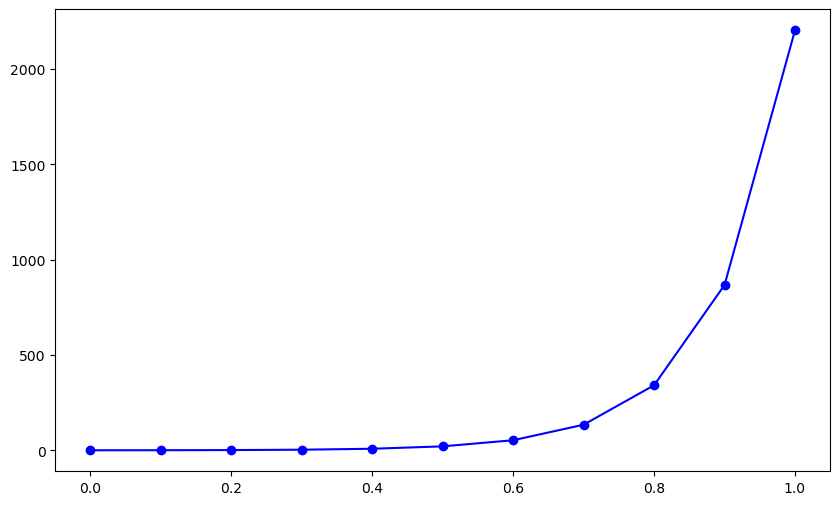

In [110]:
# generate matplotlib plot of the area vs position
plt.figure(figsize=(10, 6))
plt.plot(df['Position (m)'], df['Area (m^2)'], marker='o', label='Numerical Area', color='b')


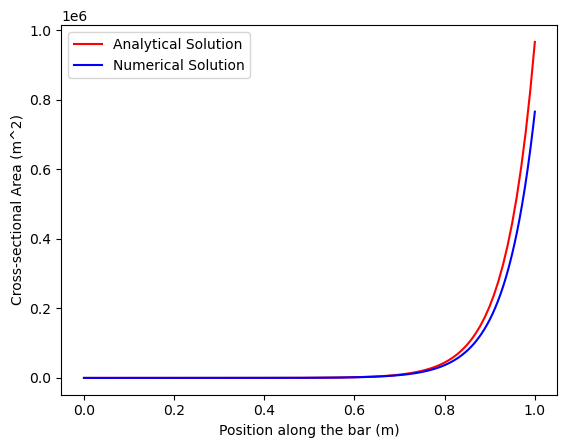

In [112]:
# plot analytical solution for comparison
x_analytical = np.linspace(0, L_length, 100)
A0 = circle_area(w0_initial_width / 2)
areas_analytical = analytical_area(x_analytical, A0, p_density, g_gravity, P_applied_force)

plt.plot(x_analytical, areas_analytical, label='Analytical Solution', color='red')
plt.plot(df['Position (m)'], df['Area (m^2)'], label='Numerical Solution', color='blue')
plt.xlabel('Position along the bar (m)')
plt.ylabel('Cross-sectional Area (m^2)')

plt.legend()